In [110]:
# Based on the titanic dataset we will predict, given the data as below, if boarder survived or not (Binary Classification)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [111]:
dataset = pd.read_csv("data/titanic.csv")

In [112]:
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [113]:
# Preprocessing the dataset

# Dropping irrelevant cols
dataset = dataset.drop("Name", axis=1) # Name is not relevant, Gender may be..
dataset = dataset.drop("Cabin", axis=1) # Cabin number is irrelevant, Class may be relevant..
dataset = dataset.drop("Ticket", axis=1) # Ticker number is irrelevant, ticket fare may be relevant..
dataset = dataset.drop("PassengerId", axis=1) # Ticker number is irrelevant, ticket fare may be relevant..

# Encoding string data so that we can input into our model
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(dataset["Sex"])

dataset["Sex"] = le.transform(dataset["Sex"])

le.fit(dataset['Embarked'])
dataset['Embarked'] = le.transform(dataset['Embarked'])

# Removing NaN Rows
dataset = dataset.dropna()
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
409,1,3,0,3.0,1,1,13.7750,2
411,1,1,0,37.0,1,0,90.0000,1
412,1,3,0,28.0,0,0,7.7750,2
414,1,1,0,39.0,0,0,108.9000,0


In [114]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(dataset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']], dataset['Survived'], test_size=0.2)

In [115]:
Xtrain.shape

(264, 7)

In [116]:
Ytrain.shape

(264,)

In [117]:
Xtest.shape

(67, 7)

In [118]:
Ytest.shape

(67,)

In [119]:
Ytrain

215    0
370    0
114    1
136    0
143    0
      ..
296    1
226    0
94     0
263    1
142    0
Name: Survived, Length: 264, dtype: int64

In [120]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2000)

model.fit(Xtrain, Ytrain)

LogisticRegression(max_iter=2000)

In [121]:
model.score(Xtest, Ytest)

1.0

In [122]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [123]:
def logistic_regression(X, Y, iterations, learning_rate):
    
    X = X.to_numpy()
    Y = Y.to_numpy()

    m = X.shape[0]
    n = X.shape[1]
    
    # print(X.shape)
    # print(Y.shape)
    
    # print(m, n, sep = " ")
    
    W = np.zeros(n)
    B = 0
    
    print(W.shape)
    
    J_all = []
    
    for i in range(iterations):
        # print(W)
        # print(B)
        Z = (np.dot(X, W)) + B

        # print(Z.shape)

        F = sigmoid(Z)

        # print(F.shape)
        
        # print(Z)
        # print(F)
        
        epsilon = 1e-9  # Small epsilon value to avoid division by zero

        E = np.sum(Y * np.log(F + epsilon) + (1 - Y) * np.log(1 - F + epsilon))

        # print(E)

        J = (-(1/m)) * E

        # print(J)

        DW = np.dot(X.T, (F - Y))
        DB = (F - Y)

        W = W - (learning_rate/m) * (DW)
        B = B - (learning_rate/m) * np.sum(DB)
        
        if(i % 10 == 0):
            J_all.append(J)

    return J_all, W, B

In [124]:
iterations = 2000
learning_rate = 0.001
Jlist, W, B = logistic_regression(Xtrain, Ytrain, iterations, learning_rate)

(7,)


In [125]:
Jlist

[0.6931471785599453,
 0.6507733184498486,
 0.6475449450170665,
 0.6466026258889227,
 0.6458341176796007,
 0.6450834072275864,
 0.6443379853651636,
 0.64359678358681,
 0.6428596670461677,
 0.6421265780137336,
 0.641397465678397,
 0.6406722804024876,
 0.6399509732514211,
 0.6392334959507758,
 0.6385198008768496,
 0.6378098410495163,
 0.6371035701251555,
 0.636400942389564,
 0.635701912750872,
 0.6350064367324731,
 0.6343144704659763,
 0.6336259706841808,
 0.6329408947140759,
 0.6322592004698719,
 0.6315808464460594,
 0.6309057917105015,
 0.6302339958975621,
 0.6295654192012679,
 0.6289000223685107,
 0.6282377666922883,
 0.6275786140049863,
 0.6269225266717035,
 0.62626946758362,
 0.625619400151412,
 0.6249722882987118,
 0.6243280964556163,
 0.6236867895522433,
 0.6230483330123389,
 0.6224126927469336,
 0.6217798351480518,
 0.6211497270824718,
 0.6205223358855407,
 0.6198976293550401,
 0.6192755757451097,
 0.6186561437602228,
 0.6180393025492187,
 0.61742502169939,
 0.6168132712306271,
 0

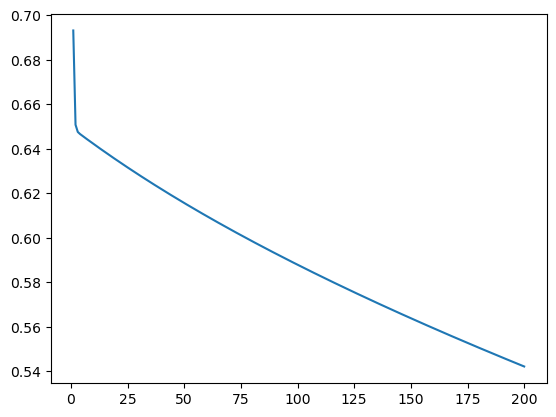

In [126]:
indices = []

for i in range(len(Jlist)):
    indices.append(i + 1)

plt.plot(indices, Jlist)

In [127]:
'''class myLogisticRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.losses = []
         
    #Sigmoid method
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def compute_loss(self, y_true, y_pred):
        # binary cross entropy
        epsilon = 1e-9
        y1 = y_true * np.log(y_pred + epsilon)
        y2 = (1-y_true) * np.log(1 - y_pred + epsilon)
        return -np.mean(y1 + y2)

    def feed_forward(self,X):
        z = np.dot(X, self.weights) + self.bias
        A = self._sigmoid(z)
        return A

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            A = self.feed_forward(X)
            self.losses.append(self.compute_loss(y,A))
            dz = A - y # derivative of sigmoid and bce X.T*(A-y)
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, dz)
            db = (1 / n_samples) * np.sum(dz)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
    def predict(self, X):
        threshold = .5
        y_hat = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(y_hat)
        y_predicted_cls = [1 if i > threshold else 0 for i in y_predicted]
        
        return np.array(y_predicted_cls)
'''

'class myLogisticRegression:\n    def __init__(self, learning_rate=0.001, n_iters=1000):\n        self.lr = learning_rate\n        self.n_iters = n_iters\n        self.weights = None\n        self.bias = None\n        self.losses = []\n         \n    #Sigmoid method\n    def _sigmoid(self, x):\n        return 1 / (1 + np.exp(-x))\n\n    def compute_loss(self, y_true, y_pred):\n        # binary cross entropy\n        epsilon = 1e-9\n        y1 = y_true * np.log(y_pred + epsilon)\n        y2 = (1-y_true) * np.log(1 - y_pred + epsilon)\n        return -np.mean(y1 + y2)\n\n    def feed_forward(self,X):\n        z = np.dot(X, self.weights) + self.bias\n        A = self._sigmoid(z)\n        return A\n\n    def fit(self, X, y):\n        n_samples, n_features = X.shape\n\n        # init parameters\n        self.weights = np.zeros(n_features)\n        self.bias = 0\n\n        # gradient descent\n        for _ in range(self.n_iters):\n            A = self.feed_forward(X)\n            self.losses

In [128]:
'''model = myLogisticRegression()

model.fit(Xtrain, Ytrain)

model.losses '''

'model = myLogisticRegression()\n\nmodel.fit(Xtrain, Ytrain)\n\nmodel.losses '

In [129]:
def mypredict(W, B, X):
    X = X.to_numpy()
    
    y_prob = sigmoid(np.dot(X, W) + B)
    
    predictions = []
    
    for element in y_prob:
        
        if element >= 0.5:
            predictions.append(1)
        
        else:
            predictions.append(0)
    
    return np.array(predictions, dtype='int32')


def myscore(Ytest, Ypred):
    
    correct = 0
    incorrect = 0
    
    for x, y in zip(Ytest, Ypred):
        
        if x == y:
            correct += 1
        
        else:
            incorrect += 1
    
    return (correct / (incorrect + correct)) 

In [130]:
Ypred = mypredict(W, B, Xtest)
print(myscore(Ytest, Ypred))

0.6417910447761194


# Secret to Success: Always Keep Going, Don't Stop!! Even if all the odds are against you..  